# Tracking rainforest development in the amazon rainforest between 2010 and 2020

Within this project we are trying to show and calculate forest loss in the South American Amazon rainforest within a ten year period. We will use the land cover data cube 
(https://s3.eu-central-1.amazonaws.com/deep-esdl-public/LC-1x2160x2160-1.0.0.levels/5.zarr) that relies on data provided and summarised by the Université Catholique de Louvain.
It is widely known that the amazon rainforest decreases by a large amount of trees every year, but we wanted to see, if it is possible to see that large decrease within the 
ten years of the data cube as well. As a tool to develope our model, we created three modules to process the data.
To visualize that change, we have to modify the data cube in such a way that it is possible with the Laptops that we have. A test cube was first created as a subset of the original cube. Firstly to decrease the size and secondly to only look at the amazon region instead of the whole cube. Eventually we selected following extent as our research area: XXXX
sample cube, extent, sources at the end

A few things are to be noted before putting the results into perspective: An error of about 5 % was proclaimed for the data set.
The way the methodology to create the data was designed, not all changed between different LCCS categories are sometimes detected, putting the results into a different perspective.
It is also worth nothing, that abrupt changes are better captured than gradual ones. Since the deforestation is a relatively drastic event into the landscape, one should think that it will definitely show in the data. The base of the maps that created the data cube is a 300m spatial resolution, which was calculated off 1km pixels, meaning any changes under 1km will not be displayed.
Also changes occurring in the 2014 - 2015 period are reduced to forest changes only. It is not further specified if that includes only loss of forest or gain of forest as well.
In the category that we used for the detection of rainforest (tree_broadleaved_evergreen_closed_to_open), if the amount of broadleaved, evergreen forest in that pixel is between 16 and 100%, it will be classified into that category. It is therefore possible that in an "tree_broadleaved_evergreen_closed_to_open" pixel, only 20% are actually broadleaved evergreen trees. Gaps were filled with nearest-neighbour method that has its own positive and negative aspects.
The total tree fraction of a pixel that has >0% trees in it is always assigned to a single tree type. In our class used, it means that the >15% broadleaf, evergreen trees will get the broad-leaved evergreen tree type. 90% in that class group are actually broadleaved-evergreen trees while 10% are natural grasses.
http://maps.elie.ucl.ac.be/CCI/viewer/download/ESACCI-LC-Ph2-PUGv2_2.0.pdf


We started by loading necessary packages.

In [9]:
using Pkg
Pkg.activate(".")
#Pkg.resolve()
Pkg.instantiate()


  Activating project at `~/workspace/uni/spatial_temporal_data/spatio_temporal_data-rainforest_development`


A module was created called "Rainforestlib", where the most important codes to process the data dube and get pixel difference results are defined. Dates of the data cube are defined (2010 until 2020), the extent was set to roughly fit with the amazon forest area.

In [10]:
# take desired lcc path/url
import JSON
lcc_url = JSON.parsefile("src/datacube_paths.json")["coarse"]

# read in the desired datacube
include("src/rainforest_lib.jl")
using .Rainforestlib
lcc = Rainforestlib.get_lc_datacube(lcc_url)

# limit space to southamerica, limit time from 2010 to 2020 
using Dates
filtered_dc = Rainforestlib.spatio_temporal_filter(lcc; lon_bounds=(-82, -34), lat_bounds= (-56.5,13), time_bounds = (Date(2010), Date(2021)))

YAXArray with the following dimensions
lon                 Axis with 540 Elements from -81.95416666666665 to -34.04305555555554
lat                 Axis with 782 Elements from 12.934722222222222 to -56.4875
time                Axis with 11 Elements from 2010-01-01T00:00:00 to 2020-01-01T00:00:00
name: lccs_class
Total size: 4.43 MB


Read out and create sets for normal forest, rainforest and a combined set.

In [11]:
include("src/LCCSClasses.jl")
using .LCCSClasses

# create a set of accepted values
rainforest_classes = Set(LCCSClasses.categories["rainforest"].lccs_classes)
forest_classes = Set(LCCSClasses.categories["forest"].lccs_classes)
all_forest_classes = union(forest_classes, rainforest_classes)

Set{String} with 13 elements:
  "tree_needleleaved_evergreen_open"
  "tree_needleleaved_deciduous_closed"
  "tree_needleleaved_deciduous_open"
  "tree_needleleaved_deciduous_closed_to_open"
  "tree_broadleaved_deciduous_open"
  "tree_broadleaved_deciduous_closed"
  "tree_broadleaved_evergreen_closed_to_open"
  "tree_cover_flooded_saline_water"
  "tree_needleleaved_evergreen_closed"
  "tree_mixed"
  "tree_broadleaved_deciduous_closed_to_open"
  "tree_cover_flooded_fresh_or_brakish_water"
  "tree_needleleaved_evergreen_closed_to_open"

Create a global map with rainforest_values to see a general distribution of rainforest worldwide.
# WARNING: do not try this with the huge datacube, it wont work. The in function needs to be ported to datacubes, the native one is not working
# to create the world map, simply set local_map=false

┌ Warning: Could not find font regular, using TeX Gyre Heros Makie
└ @ Makie ~/.julia/packages/Makie/Ylh0P/src/conversions.jl:1012


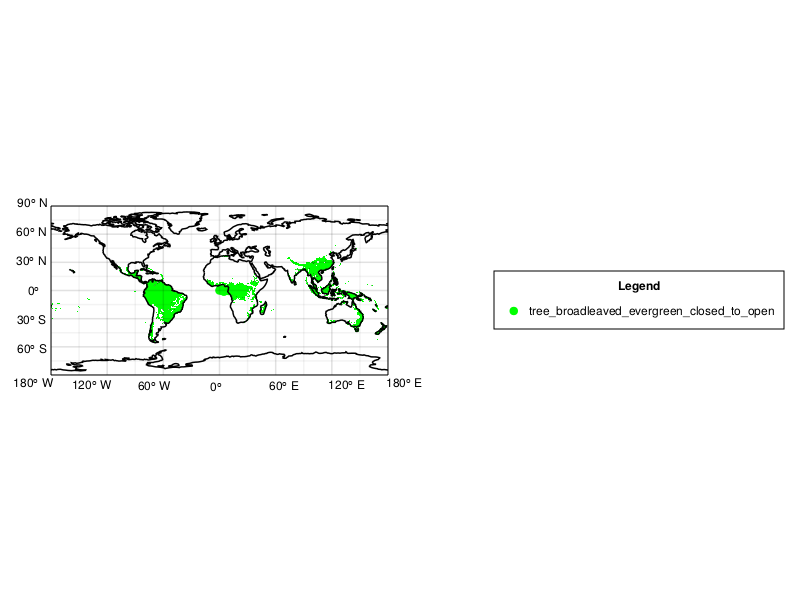

In [12]:
global_figure = Rainforestlib.build_figure_by_lcc_classes(
    lcc, 
    rainforest_classes; 
    local_map = false, 
    set_nan = true
)

Creating a map of South America's rainforest in 2010.

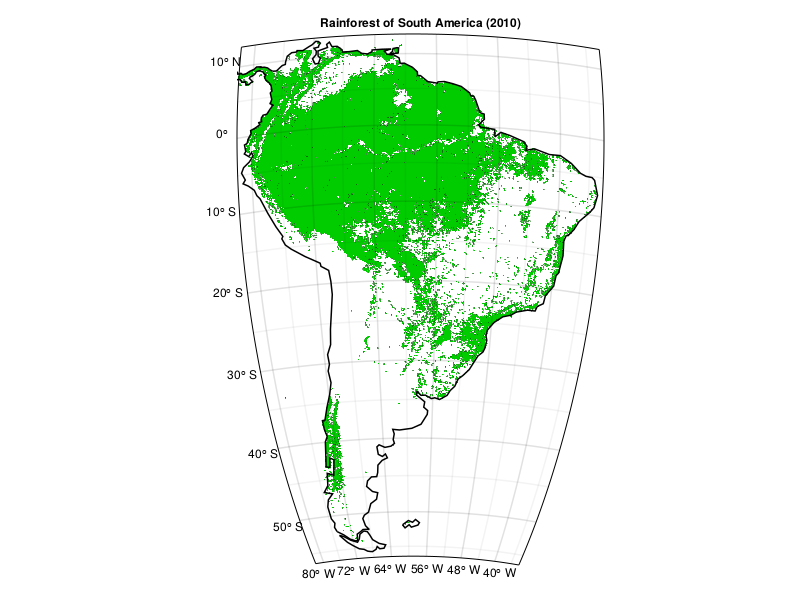

In [15]:
include("src/rainforest_lib.jl")
using .Rainforestlib
using Colors, ColorSchemes

#build a map of the rainforest in south america
# TODO WHICH YEAR?
local_figure = Rainforestlib.build_figure_by_lcc_classes(
    filtered_dc, 
    rainforest_classes; 
    title = "Rainforest of South America (2010)",
    color = RGB(0.0, 0.8, 0.0),  # Green
    set_nan = true,
    legend = false
)

Create a figure with with all forest values (with a legend of all lc classes of the forest)

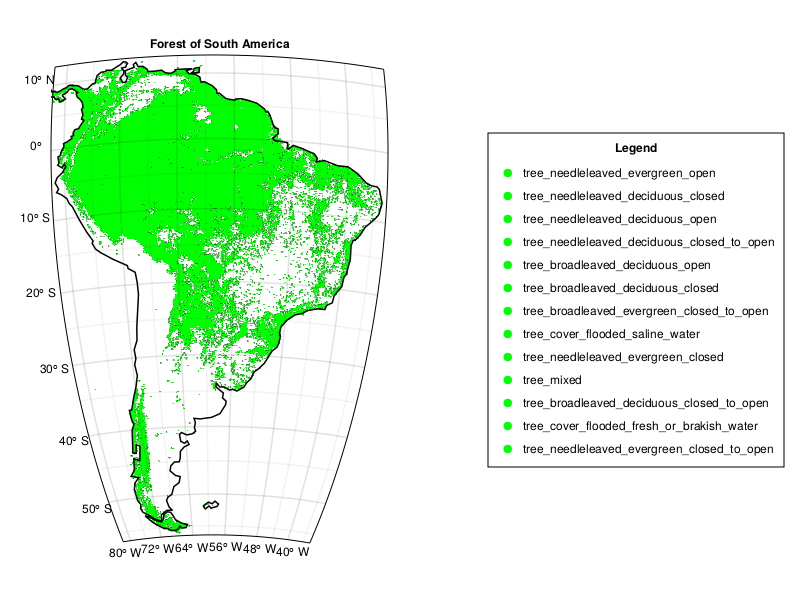

In [19]:
#using .Rainforestlib

# local is the default, and makes the map as large as the datapoints
# but can be changed by setting 

using Colors, ColorSchemes

local_figure = Rainforestlib.build_figure_by_lcc_classes(
    filtered_dc, 
    all_forest_classes; 
    color=RGB(0.0, 1.0, 0.0),
    title = "Forest of South America",
    set_nan = true
)

# using CairoMakie

# xs = 0:0.5:10
# ys = sin.(xs)

# points = [scatter!(xs, sin.(xs .* i), color = color)
#     for (i, color) in zip(1:length(custom_colormap), custom_colormap)]

# # xs = 0:0.1:10
# # lins = [lines!(xs, sin.(xs .* i), color = color)
# #     for (i, color) in zip(1:3, [:red, :blue, :green])]

# # xs = 0:0.1:10
# # lins = [lines!(xs, sin.(xs .+ 3v), color = RGBf(v, 0, 1-v)) for v in 0:0.1:0.2]

# Legend(
#     local_figure[1, 1], 
#     points,
#     ["$lcss_class" for lcss_class in first(searched_values,3)],
#     "Legend",
#     tellheight = false,
#     tellwidth = false,
#     margin = (110, 10, 50, 10),
#     halign = :left, valign = :bottom, orientation = :vertical
# )

# local_figure

The next step was to display the changes in the development of the amazon rainforest. The ultimate goal was to create pictures where the differences to the previous year are shown. Additionally, bar charts were implemented to visualize those changes.

In [21]:
# build one figure with diffs for each timestep

using .Rainforestlib
using Colors, ColorSchemes
using GLMakie

Rainforestlib.build_diff_figures_over_time(filtered_dc, Rainforestlib.LCCSClasses.categories["rainforest"], "imgs"; resolution = (3000, 3000))

Number of rainforest pixels in 2010-01-01T00:00:00: 72530.0
Number of rainforest pixels in 2011-01-01T00:00:00: 72493.0
Number of rainforest pixels in 2012-01-01T00:00:00: 72500.0
Number of rainforest pixels in 2013-01-01T00:00:00: 72496.0
Number of rainforest pixels in 2014-01-01T00:00:00: 72550.0
Number of rainforest pixels in 2015-01-01T00:00:00: 72549.0
Number of rainforest pixels in 2016-01-01T00:00:00: 72569.0
Number of rainforest pixels in 2017-01-01T00:00:00: 72564.0
Number of rainforest pixels in 2018-01-01T00:00:00: 72527.0
Number of rainforest pixels in 2019-01-01T00:00:00: 72552.0
Number of rainforest pixels in 2020-01-01T00:00:00: 72558.0


In [22]:
using .Rainforestlib

local_figure = Rainforestlib.build_figure_all_classes(filtered_dc; set_nan = true)

LoadError: MethodError: no method matching get_category_val_for_selected_categories(::UInt8, ::Set{Main.Rainforestlib.LCCSClasses.Category})

[0mClosest candidates are:
[0m  get_category_val_for_selected_categories(::UInt8, [91m::Array{Main.Rainforestlib.LCCSClasses.Category}[39m)
[0m[90m   @[39m [35mMain.Rainforestlib[39m [90m~/workspace/uni/spatial_temporal_data/spatio_temporal_data-rainforest_development/src/[39m[90m[4mLCCSClasses.jl:217[24m[39m


In [ ]:
Rainforestlib.build_plots_over_time(filteset_nanred_dc, all_forest_values; resolution=(2000, 2000), set_nan = true)

UndefVarError: UndefVarError: `filteset_nanred_dc` not defined

Number of rainforest pixels in 2010: 58667.0
Diff to last: 58667.0


Number of rainforest pixels in 2011: 58635.0
Diff to last: -32.0


Number of rainforest pixels in 2012: 58628.0
Diff to last: -7.0


Number of rainforest pixels in 2013: 58620.0
Diff to last: -8.0


Number of rainforest pixels in 2014: 58643.0
Diff to last: 23.0


Number of rainforest pixels in 2015: 58643.0
Diff to last: 0.0


Number of rainforest pixels in 2016: 58667.0
Diff to last: 24.0


Number of rainforest pixels in 2017: 58677.0
Diff to last: 10.0


Number of rainforest pixels in 2018: 58671.0
Diff to last: -6.0


Number of rainforest pixels in 2019: 58708.0
Diff to last: 37.0


Number of rainforest pixels in 2020: 58720.0
Diff to last: 12.0


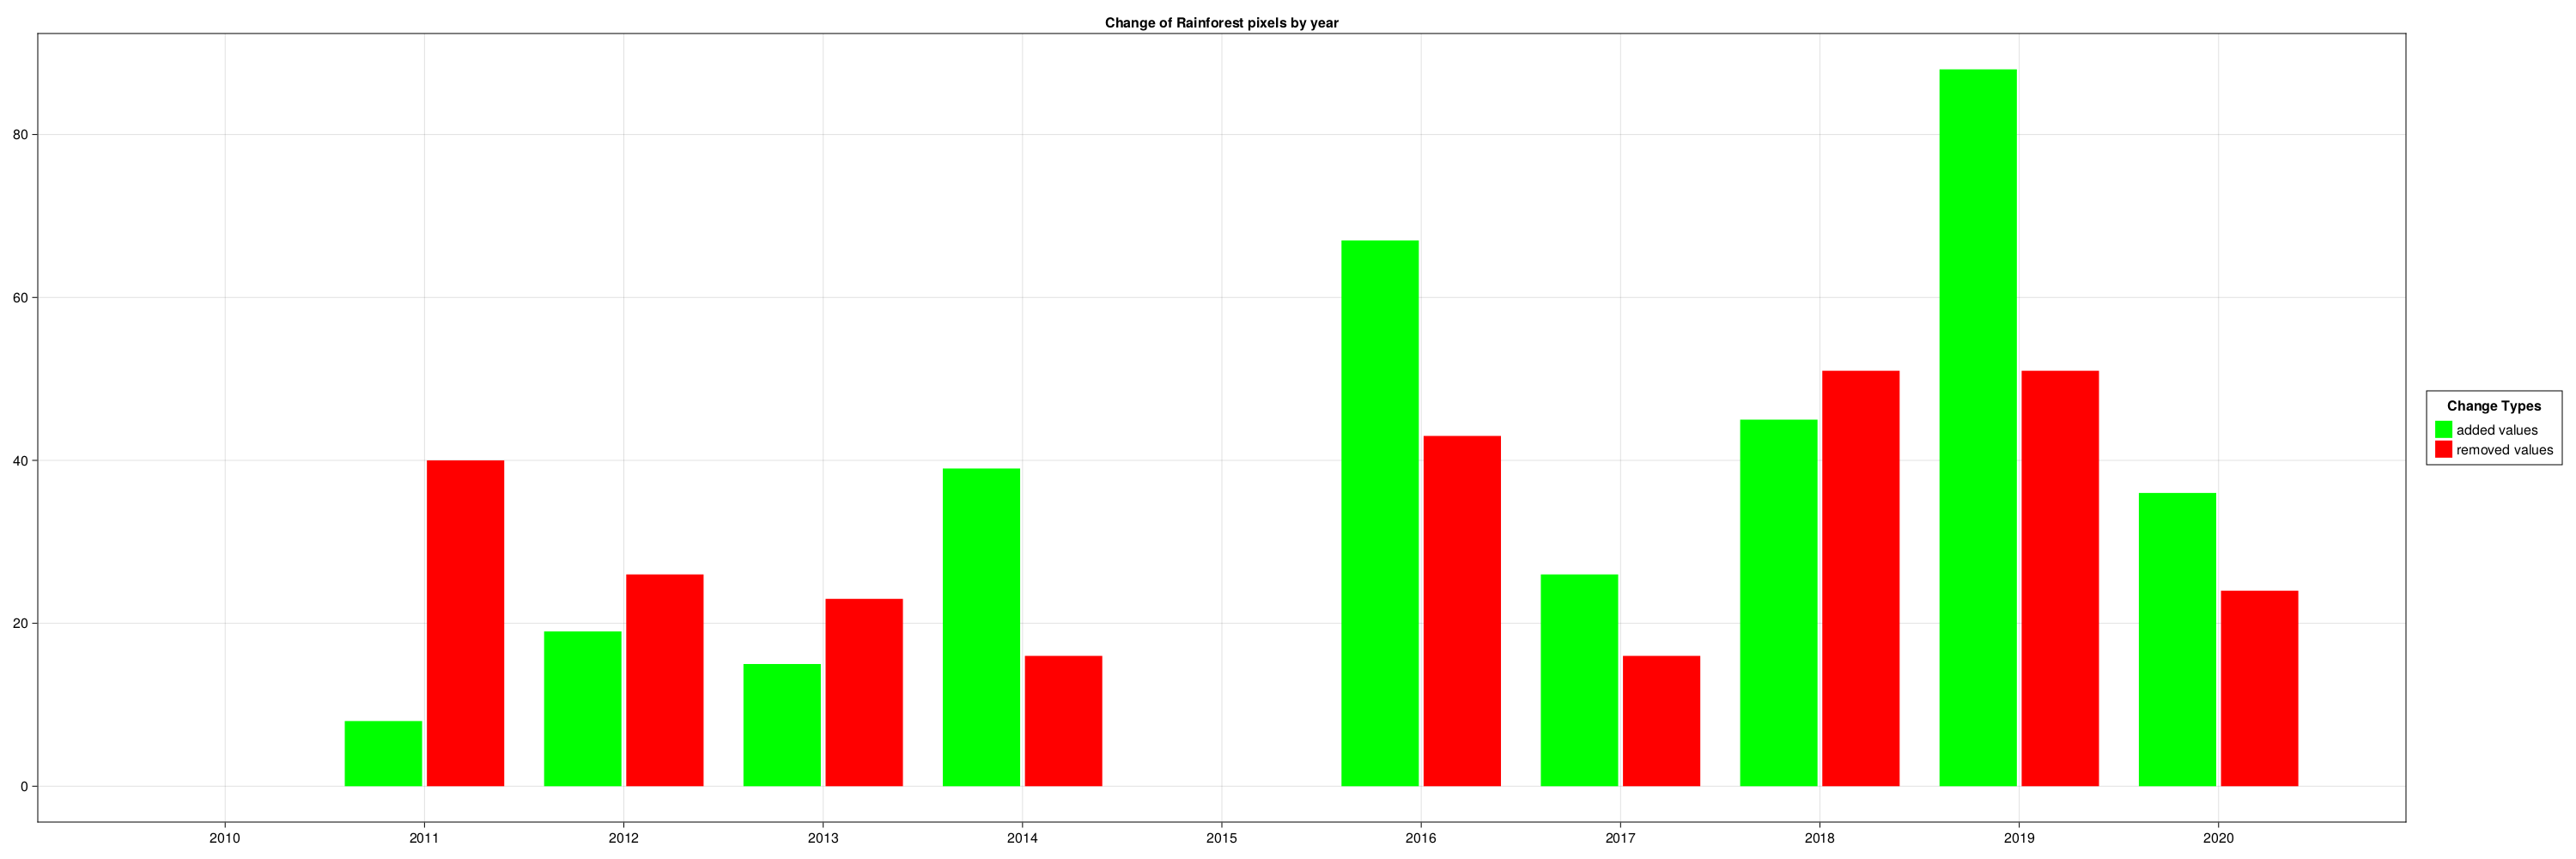

In [ ]:
# build a bar chart with rainforest changes
Rainforestlib.rainforest_diff_over_time(filtered_dc, Rainforestlib.LCCSClasses.categories["rainforest"]; resolution = (3000, 1000), gradual_diff = true)

In [ ]:
# set a set of accepted values
rainforest_values = Set(Rainforestlib.LCCSClasses.categories["rainforest"].lccs_classes)

forest_values = Set(Rainforestlib.LCCSClasses.categories["forest"].lccs_classes)

all_forest_values = union(forest_values, rainforest_values)

all_forest_category = Rainforestlib.LCCSClasses.merge_categories(
    "all_forest",
    0.15,
    Set([Rainforestlib.LCCSClasses.categories["forest"], Rainforestlib.LCCSClasses.categories["rainforest"]])

ErrorException: syntax: incomplete: premature end of input

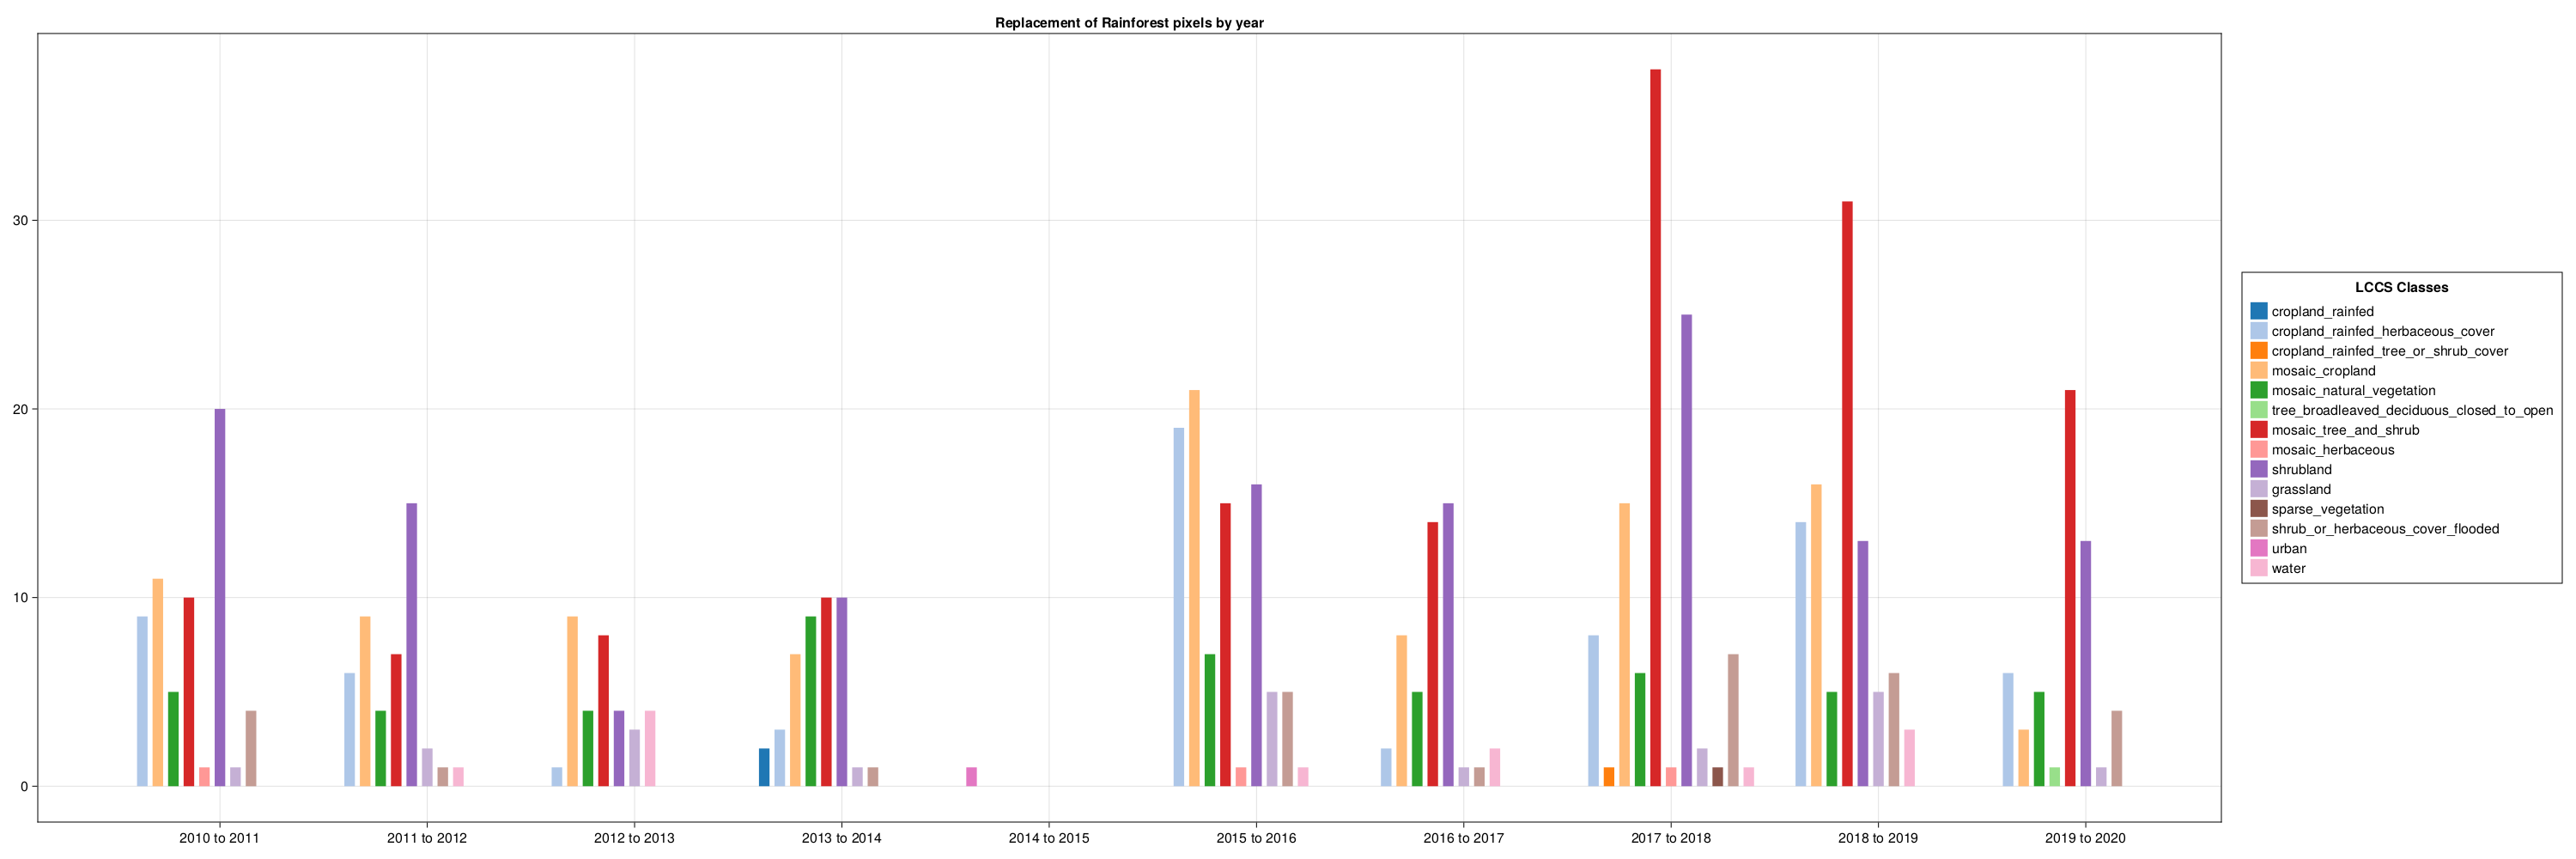

In [23]:
Rainforestlib.build_replacement_figure(filtered_dc, Rainforestlib.LCCSClasses.categories["rainforest"]; resolution = (3000, 1000))

In [24]:
# now here with all forest values

Rainforestlib.build_replacement_figure(filtered_dc, all_forest_category; resolution = (3000, 1000))

LoadError: UndefVarError: `all_forest_category` not defined

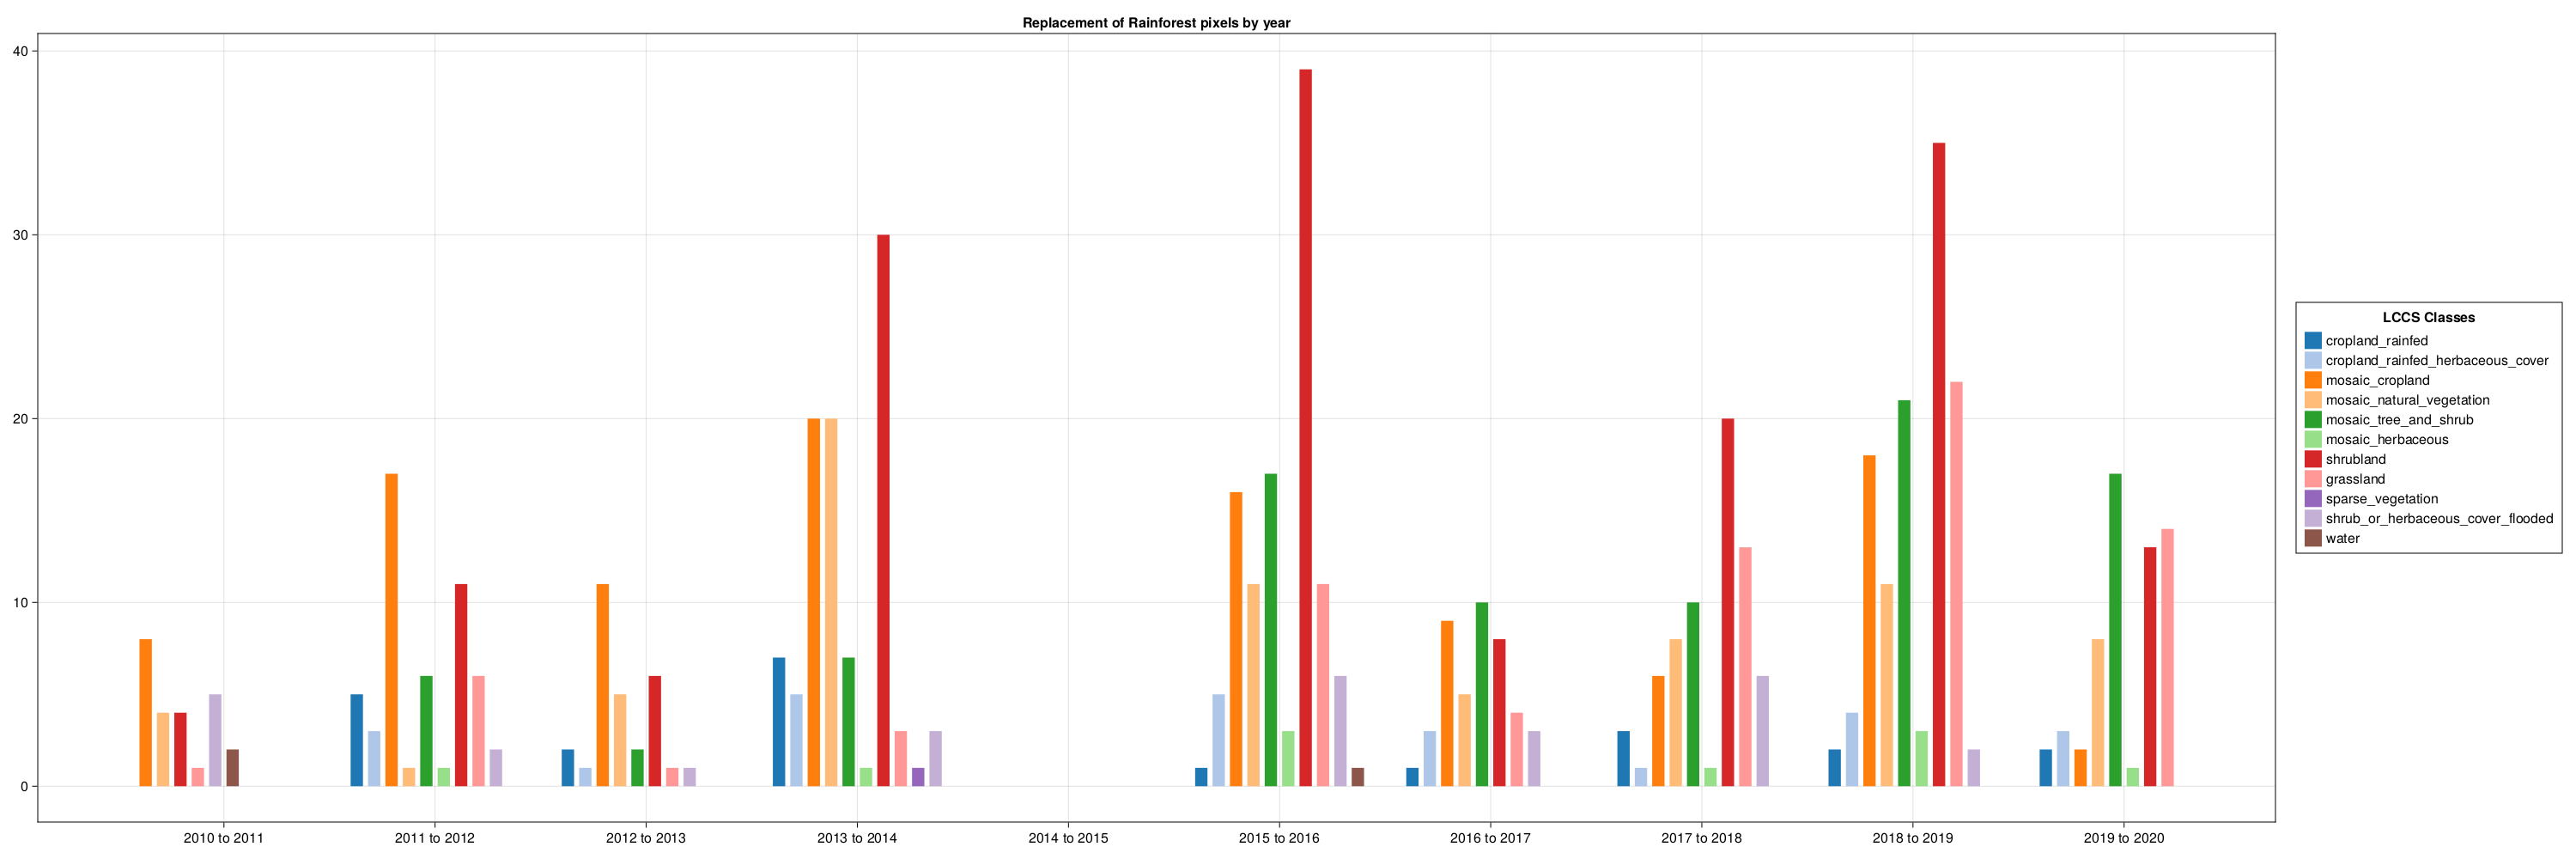

In [25]:
# this is the reverse, so it shows was there BEFORE it was turned into rainforest

Rainforestlib.build_replacement_figure(filtered_dc, Rainforestlib.LCCSClasses.categories["rainforest"]; resolution = (3000, 1000), reverse = true)

We additionally tried to use the function that we used for the whole area, to see for a smaller area within a soy growing area.

In [30]:
using Zarr
using YAXArrays


filtered_dc = Rainforestlib.spatio_temporal_filter(lcc; time_bounds = (Date(2010), Date(2021)))

small_soy_region_dc = Rainforestlib.spatio_temporal_filter(
    lcc;
    lon_bounds = (-57, -54),
    lat_bounds = (-10, -6), 
    time_bounds = (Date(2010), Date(2021))
)

YAXArray with the following dimensions
lon                 Axis with 34 Elements from -56.97638888888888 to -54.04305555555554
lat                 Axis with 45 Elements from -6.0875 to -9.998611111111112
time                Axis with 11 Elements from 2010-01-01T00:00:00 to 2020-01-01T00:00:00
name: lccs_class
Total size: 16.44 KB


In [31]:
using .Rainforestlib

# local is the default, and makes the map as large as the datapoints
# but can me changed by setting 

using Colors, ColorSchemes

custom_colormap = [
    RGB(1.0, 1.0, 1.0),  # Red
    RGB(0.0, 0.0, 1.0),  # Blue
    RGB(0.0, 1.0, 0.0)   # Green
]

local_figure = Rainforestlib.build_figure_by_lcc_classes(small_soy_region_dc, all_forest_category; colormap = custom_colormap, colorrange = (0,1), set_nan = true)

LoadError: UndefVarError: `all_forest_values` not defined

In [ ]:
# build one figure with diffs for each timestep

Rainforestlib.build_diff_figures_over_time(small_soy_region_dc, Rainforestlib.LCCSClasses.categories["rainforest"], "imgs"; name_base = "diff_first_year_small_soy_region", resolution = (3000, 3000))


In addition to the soy growing area, we also selected an area, where we found a significant loss of forest during a first quick research on http://maps.elie.ucl.ac.be/CCI/viewer/index.php.

In [ ]:
using Zarr
using YAXArrays

lc = Rainforestlib.get_lcc_datacube()

filtered_dc = Rainforestlib.rough_spatial_filter(lc; time_bounds = (Date(2010), Date(2021)))

forestloss_region = Rainforestlib.rough_spatial_filter(
    lc;
    lon_bounds = (-65, -63),
    lat_bounds = (-10, -9), 
    time_bounds = (Date(2010), Date(2021))
)

In [ ]:
using .Rainforestlib

# local is the default, and makes the map as large as the datapoints
# but can me changed by setting 

using Colors, ColorSchemes

custom_colormap = [
    RGB(1.0, 1.0, 1.0),  # Red
    RGB(0.0, 0.0, 1.0),  # Blue
    RGB(0.0, 1.0, 0.0)   # Green
]

local_figure = Rainforestlib.build_figure_by_lcc_classes(forestloss_region, all_forest_values; colormap = custom_colormap, colorrange = (0,1), set_nan = true)

In [ ]:
# build one figure with diffs for each timestep

Rainforestlib.build_diff_figures_over_time(forestloss_region_region, Rainforestlib.LCCSClasses.categories["rainforest"], "imgs"; name_base = "diff_first_year_small_soy_region", resolution = (3000, 3000))

summary/conclusion
- rainforst loss visible
- depending on resolution and area where you are in the amazon. Change not everywhere equal
- keeping errors explained at the beginning in mind
- show results of pixel changes, explain why the results are the way they are
- explain bar charts further, maybe pick one or two examples
- differences between whole amazon, "small soy area" and "forestloss_region"

sources: https://www.faszination-regenwald.de/info-center/zerstoerung/flaechenverluste/

http://maps.elie.ucl.ac.be/CCI/viewer/index.php

http://maps.elie.ucl.ac.be/CCI/viewer/download/ESACCI-LC-Ph2-PUGv2_2.0.pdf

Mahecha, M. D., Gans, F., Brandt, G., Christiansen, R., Cornell, S. E., Fomferra, N., Kraemer, G., Peters,
J., Bodesheim, P., Camps-Valls, G., Donges, J. F., Dorigo, W., Estupinan-Suarez, L. M., Gutierrez-Velez,
V. H., Gutwin, M., Jung, M., Londoño, M. C., Miralles, D. G., Papastefanou, P., and Reichstein, M.:
Earth system data cubes unravel global multivariate dynamics, Earth Syst. Dynam., 11, 201–234,
https://doi.org/10.5194/esd-11-201-2020, 2020.

Boulton, C.A., Lenton, T.M. & Boers, N. Pronounced loss of Amazon rainforest resilience since the
early 2000s. Nat. Clim. Chang. 12, 271–278 (2022). https://doi.org/10.1038/s41558-022-01287-8

Nobre, C. A., Sampaio, G., Borma, L. S., Castilla-Rubio, J. C., Silva, J. R., & Cardoso, M. (2016). Land-use
and climate change risks in the amazon and the need of a novel sustainable development paradigm.
Proceedings of the National Academy of Sciences, 113(39), 10759-10768.
https://doi.org/10.1073/pnas.1605516113